# Health Care - Health Expenditures

In [1]:
# importing the required libraries and reading the data
import pandas as pd

data_1 = pd.read_excel("Health_Expenditures_1.xlsx")

data_2 = pd.read_excel("Health_Expenditures_2.xlsx")

In [2]:
# removing the columns which have all null values
import numpy as np

data = pd.concat([data_1,data_2])
data.replace({':' : np.nan,'-': np.nan,'<': np.nan},inplace = True)

In [3]:
# removing the rows which have all null values
data = data.dropna(subset = data.columns[3:],how="all")

In [4]:
data = data.drop(columns = "Unnamed: 2")

In [5]:
data = data.drop(index =0)

In [6]:
# Reducing the dimensionality of the data by grabing all the years columns as single colum and their respective values
data = data.melt(id_vars=["Countries","Indicators"],var_name="Year",value_name="Value")

In [7]:
data

,Countries,Indicators,Year,Value
0,Malawi,Internal transfers and grants,2000,43.225362
1,Malawi,Voluntary prepayment,2000,3.187211
2,Malawi,Direct foreign transfers,2000,31.883387
3,Malawi,Government schemes and compulsory contributory...,2000,48.284705
4,Malawi,Government schemes,2000,48.284705
...,...,...,...,...
34794,Kiribati,Direct foreign transfers,2022,NaN
34795,Kiribati,Government schemes and compulsory contributory...,2022,NaN
34796,Kiribati,Government schemes,2022,NaN
34797,Kiribati,Voluntary health care payment schemes,2022,NaN


In [8]:
Expenditures = data["Value"]



In [9]:
# using simple imputer from scikit-learn to handle the missing values
from sklearn.impute import SimpleImputer

numerical_indices = list(range(2, data.shape[1])) 

numerical_cols = data.columns[numerical_indices]

# Replacing the null values in numerical columns with mean
imputer_numerical = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_numerical.fit_transform(data[numerical_cols])

# Replacing the null values in categorical columns with most-frequent item in the feature
categorical_cols = ['Countries', 'Indicators']  # Specify categorical columns here
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

# Data Visualization

C:\Users\hp\AppData\Local\Temp\ipykernel_14172\2576263591.py:13: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig("Health Expenditure by Internal transfers and grants.png",dpi=72)
C:\Users\hp\anaconda3\envs\DataScience\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


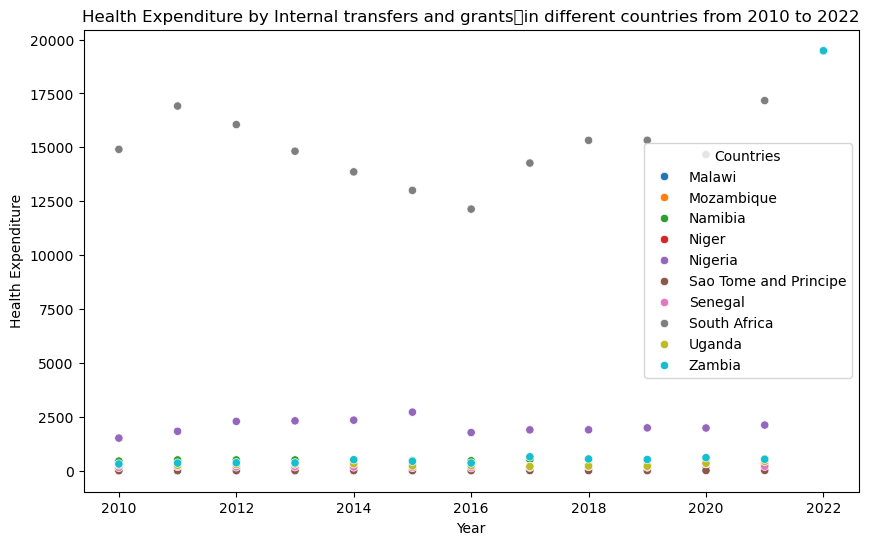

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
internal_transfers = data[data["Indicators"] == "Internal transfers and grants"]
top_countries = internal_transfers["Countries"].unique()[0:10]
latest_years = internal_transfers["Year"].unique()[10:]
internal_transfers = internal_transfers[internal_transfers["Countries"].isin(top_countries)]
internal_transfers = internal_transfers[internal_transfers["Year"].isin(latest_years)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data = internal_transfers,x="Year",y="Value", hue="Countries")
plt.xlabel("Year")
plt.ylabel("Health Expenditure")
plt.title('Health Expenditure by Internal transfers and grants	in different countries from 2010 to 2022')
plt.savefig("Health Expenditure by Internal transfers and grants.png",dpi=72)
plt.show()

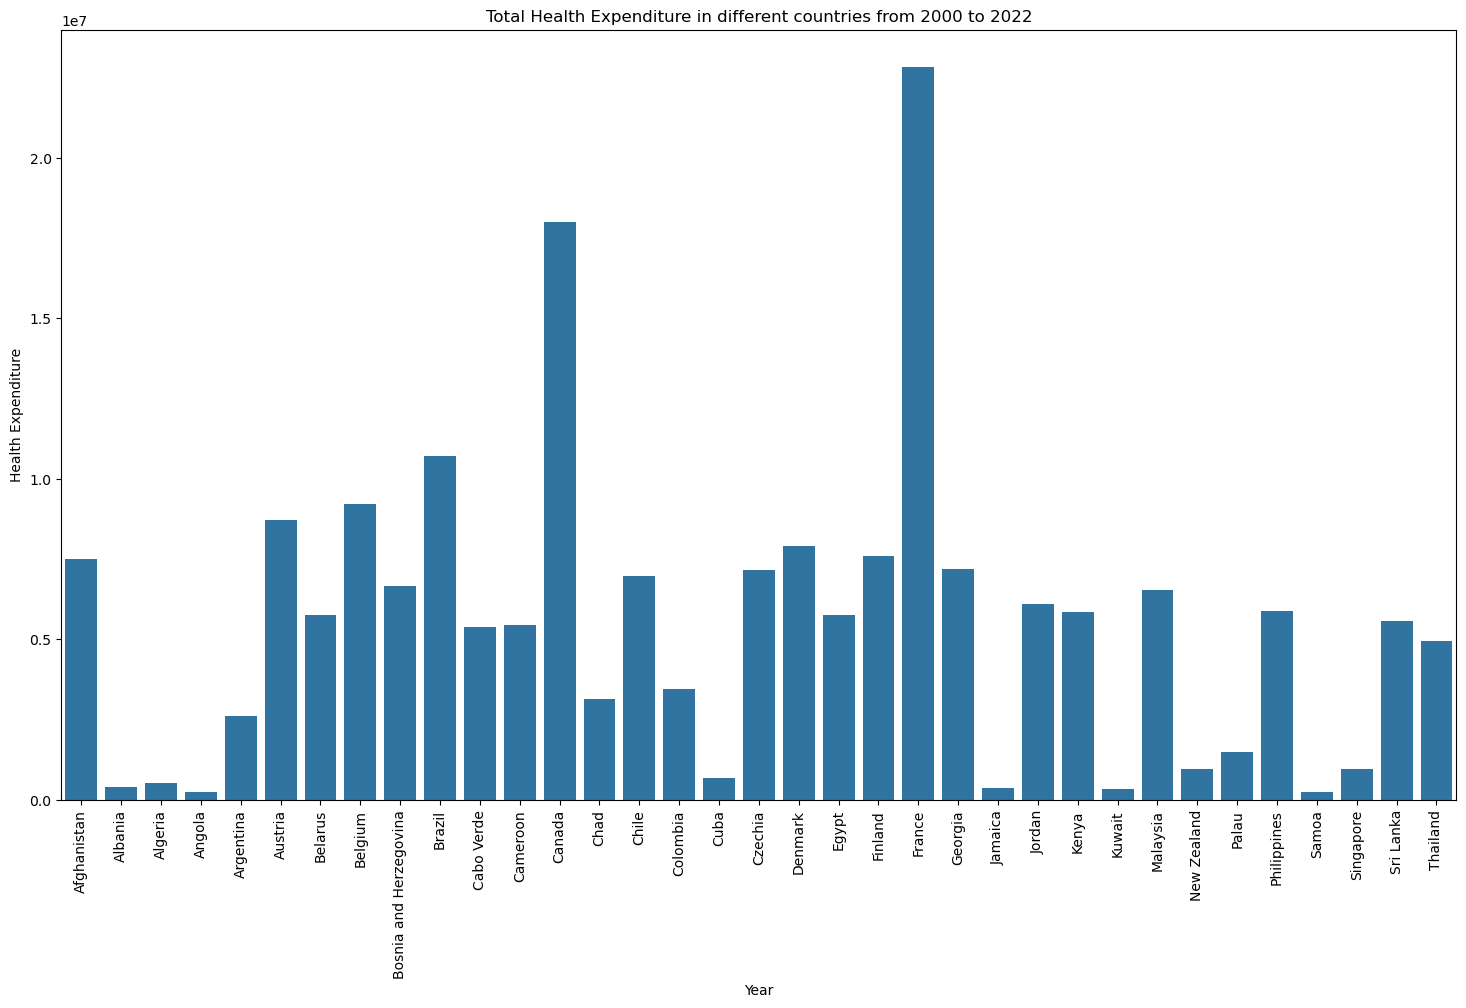

In [11]:
different_countries = data["Countries"].unique()[30:65]
countries = data[data["Countries"].isin(different_countries)]
sums = countries.groupby("Countries")["Value"].sum().reset_index()
plt.rcParams["figure.figsize"] = (18, 10)
sns.barplot(data = sums,x="Countries",y="Value")
plt.xlabel("Year")
plt.ylabel("Health Expenditure")
plt.title('Total Health Expenditure in different countries from 2000 to 2022')
plt.xticks(rotation=90)
plt.savefig("Total Health Expenditure in different countries.png",dpi=72)
plt.show()

In [12]:
# Encoding the categorical features
from sklearn.preprocessing import LabelEncoder
Le_indicators = LabelEncoder()
Le_countries = LabelEncoder()
data['Countries'] = Le_countries.fit_transform(data['Countries'])
data['Indicators'] = Le_indicators.fit_transform(data['Indicators'])

In [13]:
# Applying the standardization to the numerical features such that all the features will be on same scale which is required for the model to perform analysis effectively
from sklearn.preprocessing import StandardScaler

standardscaler_year = StandardScaler()
standardscaler_value = StandardScaler()

data[['Year']] = standardscaler_year .fit_transform(data[['Year']])
data[['Value']] = standardscaler_value .fit_transform(data[['Value']])

In [14]:
# Identifying the outliers using IQR and removing them
Q1 = data['Value'].quantile(0.25)
Q3 = data['Value'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['Value'] >= (Q1 - 1.5 * IQR)) & (data['Value'] <= (Q3 + 1.5 * IQR))]

In [15]:
cols = [col for col in data.columns if col != 'Value'] + ['Value']
data = data[cols]
data

,Countries,Indicators,Year,Value
0,40,14,-1.658312,-2.344214e-01
1,40,32,-1.658312,-2.349042e-01
2,40,8,-1.658312,-2.345581e-01
3,40,11,-1.658312,-2.343604e-01
4,40,10,-1.658312,-2.343604e-01
...,...,...,...,...
34794,38,8,1.658312,4.387175e-17
34795,38,11,1.658312,4.387175e-17
34796,38,10,1.658312,4.387175e-17
34797,38,31,1.658312,4.387175e-17


In [16]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score,accuracy_score

X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
model = RandomForestRegressor(n_estimators=100, max_depth=20)

model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

In [17]:
print("R2_Score of the model is:",r2_score(Y_test,y_pred))

R2_Score of the model is: 0.8890996519420844


+ Increased the max_depth to moderate value i.e 20 considering the amount of data which increased the r2_score of the model and doesn't cause overfitting. 

## Prediction of total health expenditures in different countries in the year 2025

In [18]:
#Caluclating the mean and standard deviation for reversing the standardization after predictions
Mean = Expenditures.mean()
std = Expenditures.std()
    
# initailize the predictions list 
predictions =[]
# predicting the expenditures
for country in Le_countries.classes_:
    country_encoded_value = Le_countries.transform([country])[0]
   
    totalexpenditure = 0
        
    #predicting by each year
    for indicator in Le_indicators.classes_:
        indicator_encoded_value = Le_indicators.transform([indicator])[0]
        year_df = pd.DataFrame({"Year": [2025]})
        YEAR = standardscaler_year.transform(year_df)[0][0]
        # prediction
        y_pred = model.predict([[country_encoded_value,indicator_encoded_value,YEAR]])

        # Reversing the standardization to get the original scale
        Y_pred = y_pred * std  + Mean
        #print(f"{indicator}",Y_pred)

        totalexpenditure += Y_pred[0]
        # Storing the predicted results
    predictions.append({'Country':country,
                        'Year':2025,
                        'Predicted Health Expenditure':totalexpenditure
                      })

    # Creating the dataframe for aggregated predictions
    predicted_df = pd.DataFrame(predictions)



predicted_df        
            

,Country,Year,Predicted Health Expenditure
0,Afghanistan,2025,639812.100891
1,Albania,2025,639812.100891
2,Algeria,2025,639812.100891
3,Angola,2025,639812.100891
4,Argentina,2025,639812.100891
...,...,...,...
73,Uganda,2025,639869.002927
74,Ukraine,2025,641192.100273
75,United States of America,2025,641192.100273
76,Zambia,2025,641192.100273


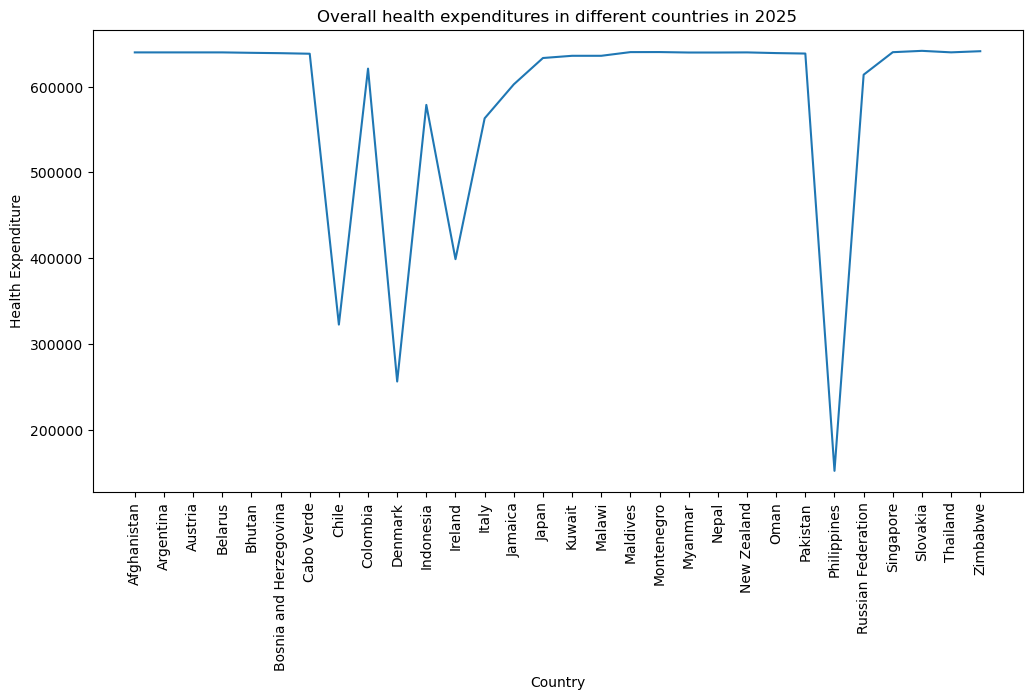

In [23]:
#Visualzing the predicted total health expenditure in different countries in 2025
countries = predicted_df['Country'].sample(n=30, random_state=42)
Data = predicted_df[predicted_df["Country"].isin(countries)]
plt.figure(figsize=(12,6))
sns.lineplot(data=Data,x="Country",y="Predicted Health Expenditure")
plt.title("Overall health expenditures in different countries in 2025")
plt.xlabel("Country")
plt.ylabel("Health Expenditure")
plt.xticks(rotation=90)
plt.savefig(("Overall health expenditures in different countries in 2025"),dpi=72,bbox_inches='tight')
plt.show()

## Top Indicators which contributed to the health expenditures around the world Over the years

In [20]:
# Aggregating the data by Indiactors and year
indicator_trends = data.groupby(["Indicators","Year"])["Value"].sum().reset_index()

#Initializing the list to store the growth rates
growthrates = []

indicators = indicator_trends["Indicators"].unique()

# Calculting the growth rate for each indiactor 
for indicator in indicators:
    indicator_data = indicator_trends[indicator_trends["Indicators"] == indicator]

    X = indicator_data[["Year"]].values
    Y = indicator_data["Value"].values

    #Training the model
    growth_model = RandomForestRegressor(n_estimators = 100,random_state=42)
    growth_model.fit(X,Y)

    years = np.arange(indicator_data["Year"].min(),indicator_data["Year"].max()+1)
    y_pred = growth_model.predict(years.reshape(-1, 1))

    #Calculating the growth rate
    growth_rate = (y_pred[-1] - y_pred[0]) / (years[-1] - years[0])

    growth_rate_reshaped = np.array([[growth_rate]])  
    # Perfroming the inverse transform on grwoth rates as we have standaridized the value during preprocessing
    original_growth_rate = standardscaler_value.inverse_transform(growth_rate_reshaped)[0][0]

    growthrates.append({'Indicator': Le_indicators.inverse_transform([indicator])[0], 'Growth_Rate':original_growth_rate })

#Storing the growth rates for each indicators in DataFrame
Growth_Df = pd.DataFrame(growthrates)

     

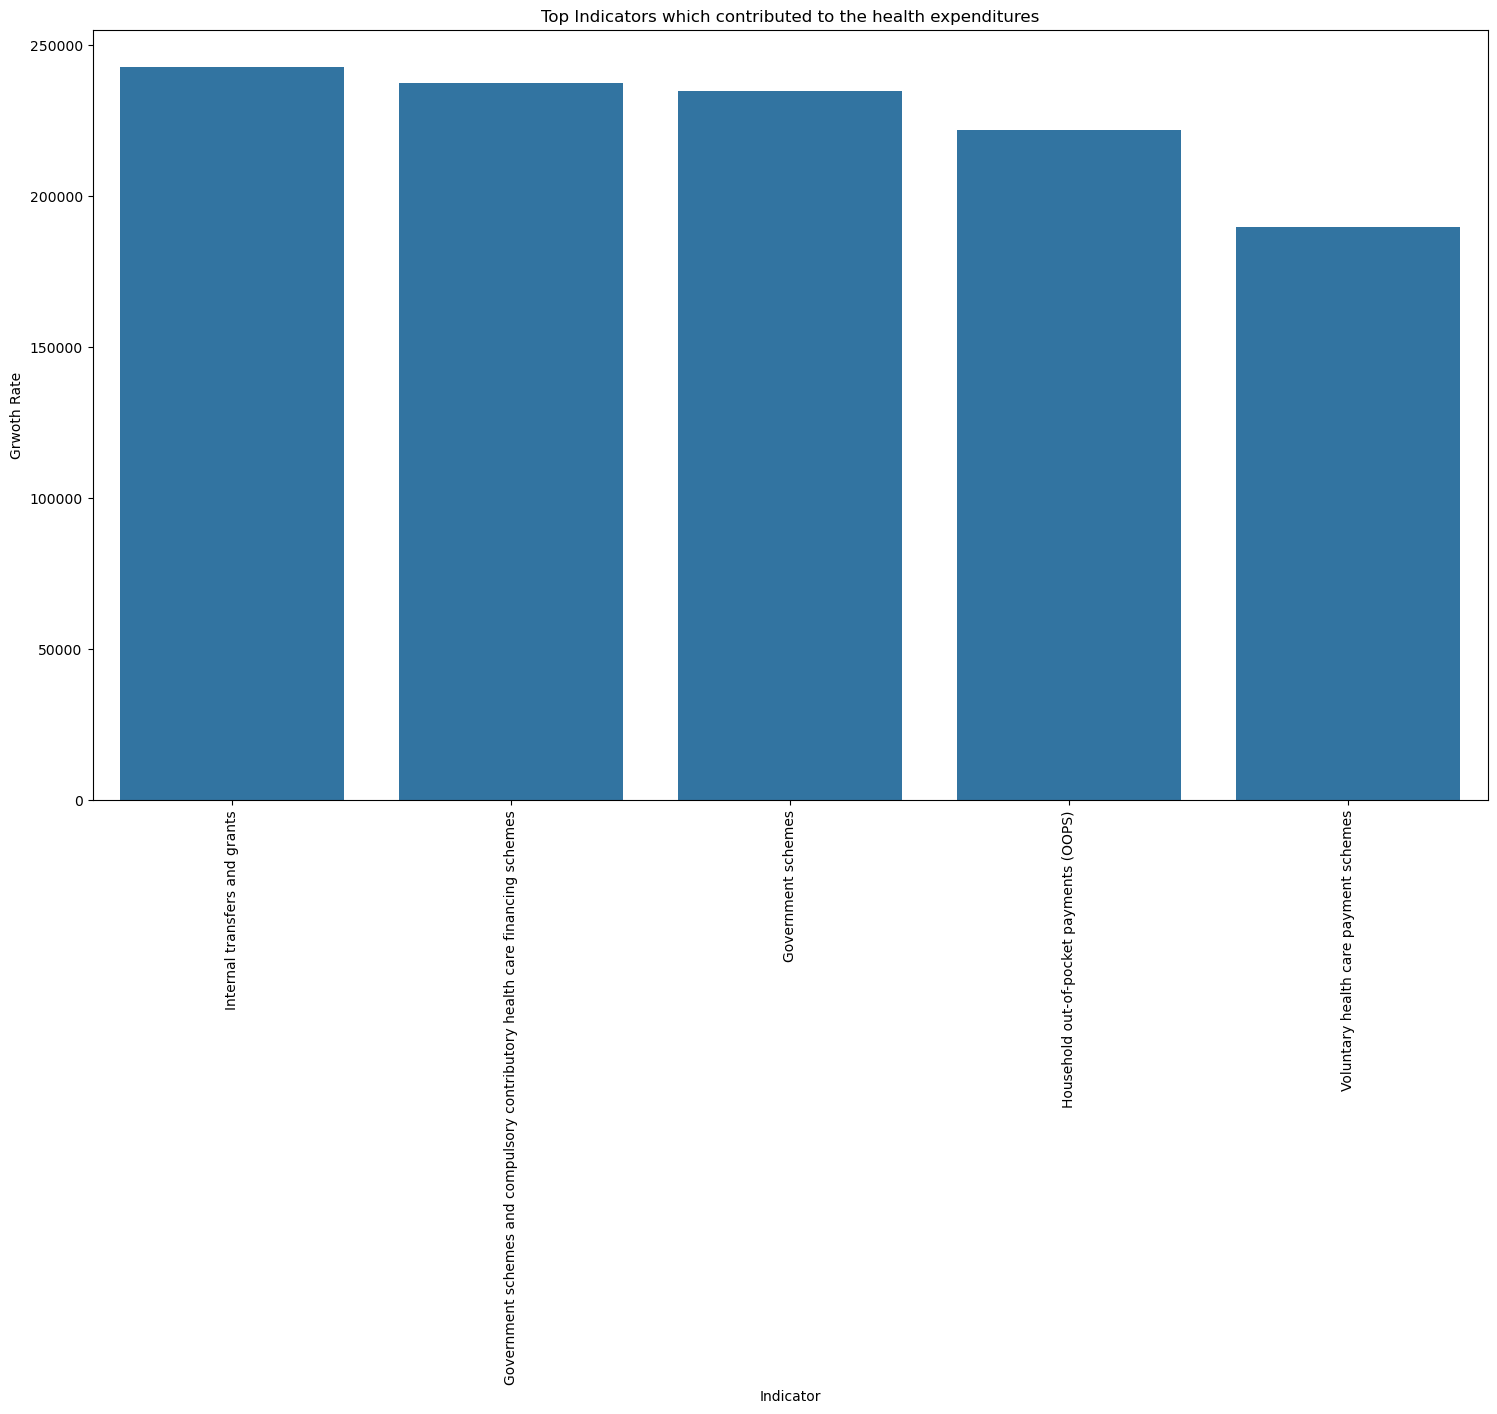

In [24]:
# Fetching the top 5 indiactors which has majorly contributed to the health expenditures
top_indicators = Growth_Df.sort_values(by='Growth_Rate', ascending=False).head(5)


# Visualizing the top contributed indiactors using bar plot
sns.barplot(data = top_indicators,x="Indicator",y="Growth_Rate")
plt.title("Top Indicators which contributed to the health expenditures")
plt.xlabel("Indicator")
plt.ylabel("Grwoth Rate")
plt.xticks(rotation=90)
plt.savefig(("Top Indicators which contributed to the health expenditures"),dpi=72,bbox_inches='tight')
plt.show()

In [22]:
top_indicators

,Indicator,Growth_Rate
14,Internal transfers and grants,242912.937748
11,Government schemes and compulsory contributory...,237410.800164
10,Government schemes,234707.464320
13,Household out-of-pocket payments (OOPS),221984.158810
31,Voluntary health care payment schemes,189689.335200
